In [37]:
%load_ext autoreload
%autoreload 2

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
import pandas as pd
import numpy as np
import random
import torch
import transformers
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
doordash_train = pd.read_csv("../local/data/doordash/all_train.csv")
doordash_test = pd.read_csv("../local/data/doordash/all_test.csv")
doordash_all = pd.concat([doordash_train, doordash_test], ignore_index=True)

doordash_test

,Business,Name,L1,L2,Image URL,L1 ID,L2 ID,Image Name
0,HyVee,saint brendan's irish cream liqueur,Alcohol,Liquor,https://fa74d61d848a20b729bb-0251b36b713060ab3...,alcohol,liquor,46892593.jpeg
1,Walgreens,festive voice waterglobe (1 ct),Household,Decorations,http://cdn.doordash.com/media/photos/1747db84-...,household,decorations,59249357.jpeg
2,Fresh Thyme,aura cacia eucalyptus 100% pure essential oil ...,Vitamins,Aromatherapy,http://cdn.doordash.com/media/photos/5fa5efc5-...,vitamins,aromatherapy,65693796.jpeg
3,Walgreens,hollywood beauty coconut oil (2 oz),Personal Care,Hair Care,http://cdn.doordash.com/media/photos/dadc4cfb-...,personal_care,hair_care,91619698.jpeg
4,Cub Foods,jell-o cherry gelatin dessert (6 oz),Pantry,Baking Mixes,http://cdn.doordash.com/media/photos/494c95d9-...,pantry,baking_mixes,3535125.jpeg
...,...,...,...,...,...,...,...,...
17090,Smart & Final,bar s sliced bacon (12 oz),Meat & Fish,Bacon,http://cdn.doordash.com/media/photos/f6fc0dda-...,meat_and_fish,bacon,49092778.jpeg
17091,Walgreens,sharpie marker retractable fine point fine (2 ct),Household,Office Supplies,http://cdn.doordash.com/media/photos/e6fcd965-...,household,office_supplies,19984289.jpeg
17092,Fresh Thyme,endangered species bar oat mlk dk chocolate rc...,Snacks,Protein & Meal Bars,http://cdn.doordash.com/media/photos/97043cfd-...,snacks,protein_and_meal_bars,81544706.jpeg
17093,Smart & Final US,"maries, dressing, poppy seed",Pantry,Dressing,https://i.mctimg.com/file/4a88ee99b60bf00119e3...,pantry,dressing,64042401.jpeg


In [43]:
google_train = pd.read_csv("../local/data/google/all_train.csv")
google_test = pd.read_csv("../local/data/google/all_test.csv")
google_all = pd.concat([google_train, google_test], ignore_index=True)

google_all

,Business,Name,L1,L2,L1 ID,L2 ID
0,nearby at Target,"Capn Crunch Cereal, Berries - 11.5 oz",Pantry,Dry Cereal,pantry,dry_cereal
1,Azure Standard,Frontier Herb Broth Powder - No Beef - Bulk - ...,Personal Care,Oral Health,personal_care,oral_health
2,Lymphedema Products,Circaid Pac Band,Medicine,First Aid,medicine,first_aid
3,Ergode,"Aveda Shampure Body Lotion, 6.7 Ounce",Personal Care,Skin Care,personal_care,skin_care
4,CakeSupplyShop,Best Day Ever Edible Cake Decoration Topper Image,Pantry,Sweet Toppings,pantry,sweet_toppings
...,...,...,...,...,...,...
199722,eBay - zorotools,Vikan 3890 Hand Scrub Brush - Stiff - Green,Household,Cleaning,household,cleaning
199723,Emi Jay,EMI Jay Lilac Dreams 5-Pack Hair Ties,Personal Care,Beauty Tools,personal_care,beauty_tools
199724,Walmart - Kings of Comfort,Matrix Wyndham Revitalizing Massage Soap Lot o...,Personal Care,Bath & Body,personal_care,bath_and_body
199725,esavebig.com,Tattoo Mega Value Pack Dora,Personal Care,Makeup,personal_care,makeup


In [44]:
instacart_train = pd.read_csv("../local/data/instacart/all_train.csv")
instacart_test = pd.read_csv("../local/data/instacart/all_test.csv")
instacart_all = pd.concat([instacart_train, instacart_test], ignore_index=True)

instacart_all

,Business,Name,L1,L2,L1 ID,L2 ID
0,Balducci's,Balducci SHRIMP 16/20CT/PER LB. C&C TAIL ON P...,Meat & Fish,Seafood,meat_and_fish,seafood
1,O Organics Market,"Open Nature Concentrated Dish Washing Liquid, ...",Household,Cleaning,household,cleaning
2,Spring Market,Banquet Mega Bowl Buffalo Chicken Macaroni And...,Meat & Fish,Deli Meat,meat_and_fish,deli_meat
3,Target,Trixie Pet 2 Story Chicken Coop with Outdoor R...,Pet Care,Pet Accessories,pet_care,pet_accessories
4,Jensens Foods,Ziploc Slider Stand & Fill Storage Bags (15 ct),Household,Storage,household,storage
...,...,...,...,...,...,...
20970,Rancho San Miguel Markets,Tide Simply PODS +Oxi Liquid Laundry Detergent...,Household,Laundry,household,laundry
20971,Market 5-ONE-5,"I & Love & You Dog Chews, Fresh All Rover Brea...",Pet Care,Dog Food,pet_care,dog_food
20972,Berkeley Bowl,AriZona Real Brewed Sweet Tea (23 fl oz),Drinks,Tea,drinks,tea
20973,El Super Fresh,"Purina ALPO Gravy Wet Dog Food, Prime Cuts Ste...",Pet Care,Dog Food,pet_care,dog_food


## L1 class frequencies

By Percentage Frequency

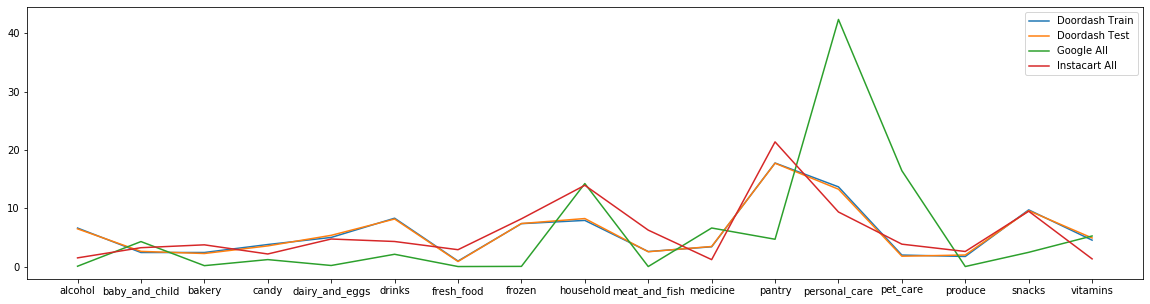

In [45]:
counts = pd.DataFrame({
    "Doordash Train": doordash_train["L1 ID"].value_counts() * 100 / len(doordash_train),
    "Doordash Test": doordash_test["L1 ID"].value_counts() * 100 / len(doordash_test),
    "Google All": google_all["L1 ID"].value_counts() * 100 / len(google_all),
    "Instacart All": instacart_all["L1 ID"].value_counts() * 100 / len(instacart_all)
})

plot = counts.plot(y=["Doordash Train", "Doordash Test", "Google All", "Instacart All"], figsize=(20, 5))
plot.set_xticks(range(len(counts)))
plot.set_xticklabels(list(counts.index))
plot

Absolute number of samples

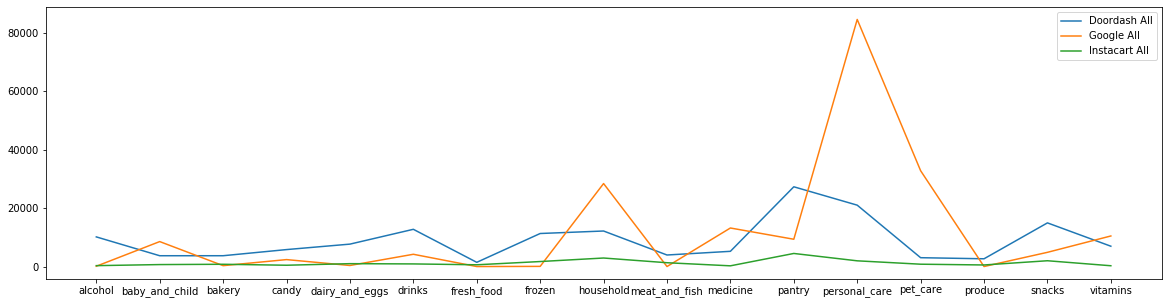

In [46]:
counts = pd.DataFrame({
    "Doordash All": doordash_train["L1 ID"].value_counts(),
    "Google All": google_all["L1 ID"].value_counts(),
    "Instacart All": instacart_all["L1 ID"].value_counts()
})

plot = counts.plot(y=["Doordash All", "Google All", "Instacart All"], figsize=(20, 5))
plot.set_xticks(range(len(counts)))
plot.set_xticklabels(list(counts.index))
plot

## L2 Class Frequencies

In [47]:
scraped = pd.DataFrame({    
    "Google All": google_all.groupby(["L1 ID", "L2 ID"]).size().replace('NaN', 0),
    "Instacart All": instacart_all.groupby(["L1 ID", "L2 ID"]).size().replace('NaN', 0)
})

In [48]:
# samples per L2 class
class_data = pd.DataFrame({
    "Doordash Train": doordash_train.groupby(["L1 ID", "L2 ID"]).size(), 
    "Doordash Test": doordash_test.groupby(["L1 ID", "L2 ID"]).size(), 
    "Scraped": scraped.sum(axis=1, min_count=1),
})

pd.options.display.float_format = '{:,.0f}'.format

print(class_data.sort_values('Doordash Train', ascending=False).to_string())

pd.reset_option('^display.', silent=True)

                                      Doordash Train  Doordash Test  Scraped
L1 ID          L2 ID                                                        
personal_care  makeup                          5,377            581   17,043
alcohol        wine                            4,088            433       71
personal_care  hair_care                       3,212            352   12,218
alcohol        beer                            3,156            324       71
candy          chocolate                       3,106            353      723
vitamins       supplements                     3,016            366    9,396
frozen         meals                           2,790            305      461
snacks         chips                           2,704            315      436
drinks         juice                           2,522            262      421
pantry         spices_and_seasoning            2,167            229    1,565
               baking                          2,147            244    1,150

## Predictions

For every L1 and L2 category, we need to extract two scores: (train doordash --> test doordash) and (train doordash + google --> test doordash)

In [49]:
doordash_accs = {}  # key = (l1, l2) value = acc
scraped_accs = {}  # key = (l1, l2) value = acc
hybrid_accs = {}  # key = (l1, l2) value = acc

In [50]:
# Given predictions, calculate the accuracy per sub-category
def get_accuracies(category_id, preds, accs_dict):
    scores = preds["Pred"] == preds["Category ID"]
    accs = scores.groupby(preds["Category ID"]).mean()
    
    for subcategory_id, acc in zip(list(accs.index), list(accs)):
        accs_dict[(category_id, subcategory_id)] = [acc]

In [51]:
import os

def eval_predictions(dir_path, accs_dict):
    # key = category id, value = data frame
    predictions = {}  

    for filename in os.listdir(dir_path):
        category_id = filename[:-4]  # strip .csv
        filepath = os.path.join(dir_path, filename)

        # store (category id, predictions)
        predictions[category_id] = pd.read_csv(filepath)

    for category_id, preds in predictions.items():
        get_accuracies(category_id, preds, accs_dict)
    
    return predictions

In [52]:
doordash_preds = eval_predictions("../local/preds/nlp-doordash", doordash_accs)
scraped_preds = eval_predictions("../local/preds/nlp-doordash-google-instacart", scraped_accs)
hybrid_preds = eval_predictions("../local/preds/hybrid-doordash", hybrid_accs)

#### L1

In [53]:
supervised_l1_accs = []
scraped_l1_accs = []
hybrid_l1_accs = []

for (l1, l2), [acc] in doordash_accs.items():
    if l1 == 'grocery':
        supervised_l1_accs.append((l2, acc))

for (l1, l2), [acc] in scraped_accs.items():
    if l1 == 'grocery':
        scraped_l1_accs.append((l2, acc))
        
for (l1, l2), [acc] in hybrid_accs.items():
    if l1 == 'grocery':
        hybrid_l1_accs.append((l2, acc))
        
l1_accs = pd.DataFrame({
    'Supervised Acc': pd.Series({k: v for k, v in supervised_l1_accs}),
    'Scraped Acc': pd.Series({k: v for k, v in scraped_l1_accs}),
    'Hybrid Acc': pd.Series({k: v for k, v in hybrid_l1_accs}),
    #'Supervised Data': counts["Doordash All"],
    #'Scraped Data': counts["Instacart All"] + counts["Google All"]
})

In [54]:
l1_accs

,Supervised Acc,Scraped Acc,Hybrid Acc
alcohol,0.982805,0.968326,0.987805
baby_and_child,0.842697,0.851685,0.866213
bakery,0.869110,0.871728,0.870879
candy,0.955372,0.952066,0.972789
dairy_and_eggs,0.965027,0.948634,0.973034
drinks,0.947595,0.956210,0.956329
fresh_food,0.614865,0.581081,0.641379
frozen,0.922284,0.919112,0.933603
household,0.953802,0.963042,0.970023
meat_and_fish,0.896313,0.838710,0.888889


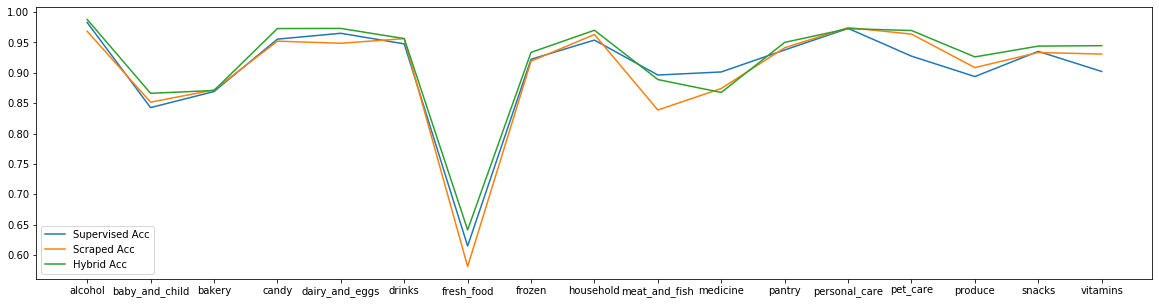

In [55]:
plot = l1_accs.plot(y=["Supervised Acc", "Scraped Acc", "Hybrid Acc"], figsize=(20, 5))
plot.set_xticks(range(len(l1_accs)))
plot.set_xticklabels(list(l1_accs.index))
plot

#### L2

In [56]:
weak_supervision_accuracies = pd.DataFrame(index=pd.MultiIndex.from_tuples(scraped_accs.keys()), columns=["Accuracy"])
supervised_accuracies = pd.DataFrame(index=pd.MultiIndex.from_tuples(doordash_accs.keys()), columns=["Accuracy"])
hybrid_accuracies = pd.DataFrame(index=pd.MultiIndex.from_tuples(hybrid_accs.keys()), columns=["Accuracy"])

for (l1_id, l2_id), acc in scraped_accs.items():
    weak_supervision_accuracies.loc[l1_id, l2_id] = acc

for (l1_id, l2_id), acc in doordash_accs.items():
    supervised_accuracies.loc[l1_id, l2_id] = acc
    
for (l1_id, l2_id), acc in hybrid_accs.items():
    hybrid_accuracies.loc[l1_id, l2_id] = acc
    
weak_supervision_accuracies

Accuracy
pet_care cat_food             0.982759
         cat_toys_and_treats       0.4
         cat_treats             0.9375
         dog_food             0.938776
         dog_treats           0.694444
...                                ...
drinks   soda                 0.971698
         sparkling_water      0.974359
         sports               0.873786
         still_water          0.907895
         tea                  0.957143

[223 rows x 1 columns]

In [59]:
class_data["Weak Supervision Accuracy"] = weak_supervision_accuracies
class_data["Supervised Accuracy"] = supervised_accuracies
class_data["Hybrid Accuracy"] = hybrid_accuracies
print(class_data.sort_values('Doordash Train', ascending=False).to_string())

                                      Doordash Train  Doordash Test  Scraped Weak Supervision Accuracy Supervised Accuracy Hybrid Accuracy
L1 ID          L2 ID                                                                                                                      
personal_care  makeup                         5377.0          581.0  17043.0                  0.969019            0.972461        0.977625
alcohol        wine                           4088.0          433.0     71.0                  0.979215            0.986143        0.980456
personal_care  hair_care                      3212.0          352.0  12218.0                  0.957386            0.963068          0.9683
alcohol        beer                           3156.0          324.0     71.0                  0.966049            0.953704        0.944186
candy          chocolate                      3106.0          353.0    723.0                  0.966006            0.983003        0.979472
vitamins       supplements 

In [60]:
# A view with L1's staying intact to quickly view groups.
print(class_data.sort_values(['L1 ID', 'Doordash Train'], ascending=False).to_string())

                                      Doordash Train  Doordash Test  Scraped Weak Supervision Accuracy Supervised Accuracy Hybrid Accuracy
L1 ID          L2 ID                                                                                                                      
vitamins       supplements                    3016.0          366.0   9396.0                   0.89071            0.833333        0.853591
               vitamins_a-z                   1188.0          139.0    583.0                  0.755396            0.798561        0.798561
               multivitamins                   851.0           91.0    523.0                  0.813187            0.769231        0.744444
               aromatherapy                    698.0           80.0    187.0                     0.925                0.95          0.9125
               homeopathy_and_immune           672.0           85.0     46.0                  0.741176            0.811765        0.785714
               childrens_he

Confusion matrix for a given model

Predicted,aromatherapy,childrens_health,homeopathy_and_immune,minerals,multivitamins,supplements,vitamins_a-z,All
Actual,,,,,,,,
aromatherapy,73,0,2,0,0,3,2,80
childrens_health,0,28,4,0,5,5,1,43
homeopathy_and_immune,2,3,66,0,2,10,1,84
minerals,2,0,1,20,7,2,1,33
multivitamins,0,1,2,5,67,7,8,90
supplements,6,8,4,1,14,309,20,362
vitamins_a-z,0,1,2,1,6,18,111,139
All,83,41,81,27,101,354,144,831


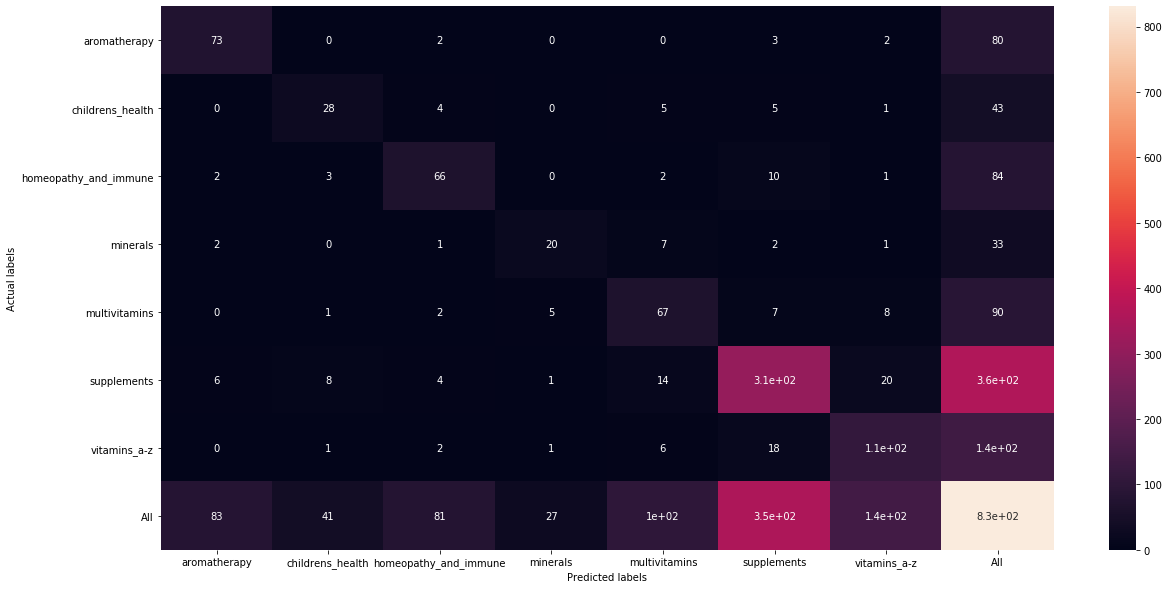

In [77]:
preds = hybrid_preds["vitamins"]

# generate confusion matrix
confusion_matrix = pd.crosstab(preds["Category ID"], preds["Pred"], margins=True)

# Set indexes to class names 
confusion_matrix.index.name = "Actual"
confusion_matrix.columns.name = "Predicted"

# Normalize confusion matrix 
#normalized_confusion_matrix = confusion_matrix / confusion_matrix.sum(axis=1)

confusion_matrix

fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(confusion_matrix, annot=True, ax=ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels') 

confusion_matrix

#### Aggregate score per model

For each model, weight each class according to frequency in total doordash distribution. Then multiply class accuracies accordingly.

In [66]:
doordash_all = class_data[["Doordash Train", "Doordash Test"]].sum(axis=1, min_count=1)
doordash_all

L1 ID     L2 ID        
alcohol   alcohol-free        3.0
          beer             3480.0
          liquor           2291.0
          mixers            251.0
          seltzer           277.0
                            ...  
vitamins  minerals          299.0
          multivitamins     942.0
          sun_care            NaN
          supplements      3382.0
          vitamins_a-z     1327.0
Length: 213, dtype: float64

In [67]:
class_weights = pd.Series(index=doordash_all.index, dtype=float)
for l1, l2_df in doordash_all.groupby(level=0):
    class_weights[l1] = l2_df / l2_df.sum()

In [75]:
print(class_weights.to_string())

L1 ID           L2 ID                
alcohol         alcohol-free             0.000266
                beer                     0.309086
                liquor                   0.203482
                mixers                   0.022293
                seltzer                  0.024603
                spiked                   0.038725
                wine                     0.401545
baby_and_child  baby_food                0.274524
                bath_and_skin            0.107496
                diapers                  0.129670
                feeding                  0.093999
                formula                  0.066040
                health                   0.127501
                toddler_snacks           0.021451
                toys                     0.128465
                wipes                    0.050856
bakery          bagels                   0.069665
                bread                    0.258861
                break_and_bake           0.089709
            

In [72]:
weak_supervised_aggregate_scores = (class_weights * class_data["Weak Supervision Accuracy"]).groupby(level=0).sum()
supervised_aggregate_scores = (class_weights * class_data["Supervised Accuracy"]).groupby(level=0).sum()
hybrid_aggregate_scores = (class_weights * class_data["Hybrid Accuracy"]).groupby(level=0).sum()

In [74]:
aggregate_scores = pd.DataFrame({
    "Weak Supervised": weak_supervised_aggregate_scores,
    "Supervised": supervised_aggregate_scores,
    "Hybrid": hybrid_aggregate_scores
})

aggregate_scores.sort_values(["Hybrid"], ascending=False)

,Weak Supervised,Supervised,Hybrid
L1 ID,,,
alcohol,0.952899,0.959373,0.958383
bakery,0.909149,0.926579,0.936632
personal_care,0.928795,0.932658,0.934654
drinks,0.922686,0.918504,0.928606
produce,0.905162,0.896308,0.919402
medicine,0.902727,0.907978,0.918477
dairy_and_eggs,0.904195,0.906925,0.914529
candy,0.903741,0.907682,0.907415
meat_and_fish,0.892853,0.888782,0.902560
